# 반도체 공정 이상탐지

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("C:\\Users\\gw011\\OneDrive\\바탕 화면\\새 폴더\\chap3. Prac\\03. 반도체 공정 AD")
os.getcwd()

'C:\\Users\\gw011\\OneDrive\\바탕 화면\\새 폴더\\chap3. Prac\\03. 반도체 공정 AD'

## 문제상황 및 데이터 살펴보기

- A사는 반도체의 성능을 향상시키기 위해서 최근 Wafer 설계를 변경하고 제품을 생산 중이다. 설계 변경으로 인해 최근 불량 제품이 발생하고 있어, 이상탐지 모델링을 통해 이상인 Wafer를 사전에 검출하고자 한다.

- 데이터 살펴보기

|Column|Description|
|:---|:---|
|feature1~n|Wafer 특성 데이터|
|Class|이상 여부|


In [3]:
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
df_train = pd.read_csv("chapter03_df_train.csv")
df_test = pd.read_csv("chapter03_df_test.csv")

df = pd.concat([df_train, df_test], axis=0)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100.0,160.0,1.6000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,20.0,83.0,4.1500,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
2,99.0,150.0,1.5151,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,40.0,40.0,1.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,12.0,234.0,19.5000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## 문제해결 프로세스 정의

> 문제정의
- 최근 설계변경으로 인한 Wafer 불량 발생

> 기대효과
- 불량 및 폐기 비용 감소

> 성과측정
- 모델 활용 전/후 wafer 불량률 비교

> 현업적용
- 공정 데이터 수집 체계 구축, 공정 데이터 Model Input

## Data 전처리 및 EDA 

In [4]:
print('df : ', df.shape)

df :  (2519, 1559)


In [7]:
pd.set_option('display.max_rows',2000)  
print(df.isnull().sum())

feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_16        0
feature_17        0
feature_18        0
feature_19        0
feature_20        0
feature_21        0
feature_22        0
feature_23        0
feature_24        0
feature_25        0
feature_26        0
feature_27        0
feature_28        0
feature_29        0
feature_30        0
feature_31        0
feature_32        0
feature_33        0
feature_34        0
feature_35        0
feature_36        0
feature_37        0
feature_38        0
feature_39        0
feature_40        0
feature_41        0
feature_42        0
feature_43        0
feature_44        0
feature_45        0
feature_46        0
feature_47        0
feature_48        0
feature_49        0
feature_50        0


In [8]:
df = df.dropna()
print(df.isnull().sum().sum())

0


In [10]:
pd.DataFrame(df.describe()) # 변수가 너무 많아서 Df 형식을 통해 확인

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,0.002269,0.006239,0.006239,0.004538,0.006239,0.004538,0.002836,0.003971,0.006239,0.004538,0.002269,0.006239,0.005672,0.002836,0.003971,0.003971,0.003971,0.003403,0.002269,0.005672,0.003971,0.005672,0.009643,0.008508,0.019853,0.005672,0.003971,0.005105,0.004538,0.006239,0.003971,0.002836,0.005672,0.006807,0.003403,0.000567,0.003403,0.013046,0.001134,0.004538,...,0.007374,0.005105,0.004538,0.005105,0.019853,0.006807,0.005105,0.004538,0.004538,0.024390,0.006807,0.007374,0.003971,0.021554,0.007374,0.007374,0.007941,0.014748,0.012479,0.001134,0.020420,0.005672,0.006807,0.031764,0.013613,0.003403,0.006239,0.006239,0.020420,0.006239,0.009075,0.002269,0.014748,0.013046,0.003403,0.005672,0.002269,0.006239,0.010210,0.005105,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,0.047592,0.078765,0.078765,0.067229,0.078765,0.067229,0.053194,0.062905,0.078765,0.067229,0.047592,0.078765,0.075121,0.053194,0.062905,0.062905,0.062905,0.058255,0.047592,0.075121,0.062905,0.075121,0.097750,0.091873,0.139533,0.075121,0.062905,0.071286,0.067229,0.078765,0.062905,0.053194,0.075121,0.082244,0.058255,0.023816,0.058255,0.113504,0.033672,0.067229,...,0.085578,0.071286,0.067229,0.071286,0.139533,0.082244,0.071286,0.067229,0.067229,0.154301,0.082244,0.085578,0.062905,0.145264,0.085578,0.085578,0.088783,0.120575,0.111041,0.033672,0.141471,0.075121,0.082244,0.175421,0.115911,0.0

In [12]:
df_min = pd.DataFrame(df.describe()).loc['min']<0
df_min

feature_1       False
feature_2       False
feature_3       False
feature_4       False
feature_5       False
feature_6       False
feature_7       False
feature_8       False
feature_9       False
feature_10      False
feature_11      False
feature_12      False
feature_13      False
feature_14      False
feature_15      False
feature_16      False
feature_17      False
feature_18      False
feature_19      False
feature_20      False
feature_21      False
feature_22      False
feature_23      False
feature_24      False
feature_25      False
feature_26      False
feature_27      False
feature_28      False
feature_29      False
feature_30      False
feature_31      False
feature_32      False
feature_33      False
feature_34      False
feature_35      False
feature_36      False
feature_37      False
feature_38      False
feature_39      False
feature_40      False
feature_41      False
feature_42      False
feature_43      False
feature_44      False
feature_45      False
feature_46

In [13]:
pd.Series(df_min).value_counts()

min
False    1559
Name: count, dtype: int64

In [14]:
# 이상치갯수 확인
df['Class'].value_counts()

Class
0.0    1620
1.0     143
Name: count, dtype: int64

In [15]:
df_normal = df[df['Class']==0]
df_abnormal = df[df['Class']==1]

df_normal_mean = pd.DataFrame(df_normal.describe()).loc['mean']
df_abnormal_mean = pd.DataFrame(df_abnormal.describe()).loc['mean']

In [16]:
df_concat = pd.concat([df_normal_mean, df_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
feature_1,52.987037,54.307692,1.320655
feature_2,113.830864,271.097902,157.267038
feature_3,3.277053,5.087976,1.810923
feature_4,0.721605,0.755245,0.033640
feature_5,0.003086,0.000000,0.003086


In [17]:
df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10)
df_top10

,normal,abnormal,gap
feature_2,113.830864,271.097902,157.267038
feature_3,3.277053,5.087976,1.810923
feature_1,52.987037,54.307692,1.320655
Class,0.000000,1.000000,1.000000
feature_1244,0.040123,0.412587,0.372464
feature_1400,0.022840,0.363636,0.340797
feature_352,0.033333,0.328671,0.295338
feature_969,0.024074,0.293706,0.269632
feature_1154,0.016667,0.272727,0.256061
feature_1484,0.035185,0.286713,0.251528


In [18]:
df_concat.sort_values(by=['gap'], ascending=False).head(10).iloc[1:,:]

,normal,abnormal,gap
feature_3,3.277053,5.087976,1.810923
feature_1,52.987037,54.307692,1.320655
Class,0.000000,1.000000,1.000000
feature_1244,0.040123,0.412587,0.372464
feature_1400,0.022840,0.363636,0.340797
feature_352,0.033333,0.328671,0.295338
feature_969,0.024074,0.293706,0.269632
feature_1154,0.016667,0.272727,0.256061
feature_1484,0.035185,0.286713,0.251528


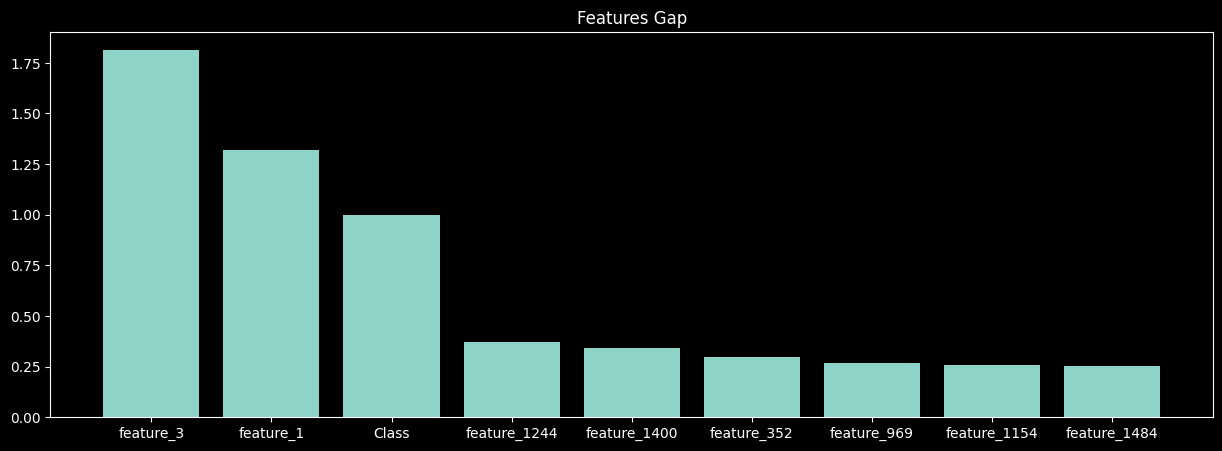

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

# df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10)
df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10).iloc[1:,:]

df_top10 = df_top10.sort_values(by=['gap'], ascending=False) # default 욥션
fig = plt.figure(figsize=(15,5));
plt.title('Features Gap');
plt.bar(df_top10.index, df_top10['gap']);

## Feature Selection

In [21]:
# 표준화
from sklearn.preprocessing import StandardScaler

X= df.drop(['Class'], axis=1)
Y= df['Class']

X_ = StandardScaler().fit_transform(X)

In [22]:
df_s = pd.concat([pd.DataFrame(X_, columns=X.columns), pd.DataFrame(Y, columns=['Class'])], axis=1)
df_s.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337,0.0
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337,0.0
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,8.697826,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.0

In [23]:
df_s_normal = df_s[df_s['Class']==0]
df_s_abnormal = df_s[df_s['Class']==1]

df_s_normal_mean = pd.DataFrame(df_s_normal.describe()).loc['mean']
df_s_abnormal_mean = pd.DataFrame(df_s_abnormal.describe()).loc['mean']

In [24]:
df_concat = pd.concat([df_s_normal_mean, df_s_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
feature_1,-0.001919,0.021738,0.023657
feature_2,-0.098259,1.113139,1.211398
feature_3,-0.032173,0.364475,0.396648
feature_4,-0.006106,0.069176,0.075282
feature_5,0.004708,-0.053330,0.058038


In [25]:
df_top10 = df_concat.sort_values(by=['gap'], ascending=False).head(10)
df_top10

,normal,abnormal,gap
feature_1400,-0.126258,1.430335,1.556593
feature_1244,-0.118146,1.338440,1.456586
feature_1154,-0.109412,1.239495,1.348908
feature_1048,-0.108304,1.226937,1.335241
feature_1144,-0.108278,1.226650,1.334928
feature_1345,-0.106160,1.202657,1.308817
feature_1425,-0.106011,1.200961,1.306972
feature_1199,-0.106011,1.200961,1.306972
feature_1155,-0.106011,1.200961,1.306972
feature_1423,-0.106011,1.200961,1.306972


In [26]:
# 연속형 변수 구간화
df_s_des = pd.DataFrame(df_s.describe())
df_s_des

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,...,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000,1.763000e+03,1763.000000,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1.763000e+03,1763.000000
mean,4.735608e-17,-5.037881e-18,8.060610e-18,-1.410607e-17,1.209091e-17,2.015152e-17,0.000000,2.821213e-17,-1.007576e-17,-1.007576e-17,3.224244e-17,6.045457e-18,1.410607e-17,2.015152e-17,6.045457e-18,-1.007576e-17,6.045457e-18,-2.418183e-17,0.000000,-1.007576e-17,1.813637e-17,1.007576e-17,9.068186e-18,-5.037881e-18,-2.619698e-17,-3.627274e-17,-3.022729e-17,1.309849e-17,2.821213e-17,5.037881e-18,-3.627274e-17,2.821213e-17,3.224244e-17,2.619698e-17,-4.030305e-17,6.045457e-18,-2.921971e-17,-4.030305e-18,2.015152e-17,1.360228e-17,-3.627274e-17,1.813637e-17,2.518940e-17,-2.015152e-17,3.022729e-18,-4.030305e-18,3.022729e-18,3.828790e-17,-4.030305e-18,-8.060610e-18,...,3.979926e-17,-1.813637e-17,-1.612122e-17,-8.060610e-18,0.000000,-2.317425e-17,-8.060610e-18,-8.060610e-18,-7.053033e-18,7.254549e-17,-1.612122e-17,3.627274e-17,-2.972350e-17,-7.053033e-18,2.418183e-17,3.224244e-17,0.000000,8.060610e-18,0.000000,6.045457e-18,6.045457e-17,1.612122e-17,-2.418183e-17,-6.851518e-17,-1.612122e-17,-4.030305e-18,2.015152e-18,9.068186e-18,5.239396e-17,8.060610e-18,-8.060610e-18,3.022729e-17,5.037881e-18,3.677653e-17,4.030305e-18,2.216668e-17,3.224244e-17,1.108334e-17,-1.612122e-17,-1.209091e-17,-3.425759e-17,4.030305e-18,1.410607e-17,-3.627274e-17,-3.224244e-17,2.468562e-17,5.037881e-18,4.030305e-17,8.060610e-18,0.081112
std,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,1.000284e+00,

In [27]:
import numpy as np 

for i,col in enumerate(df_s.columns[:-1]):
    bins =  [df_s_des.loc['min'][i], df_s_des.loc['25%'][i], df_s_des.loc['75%'][i], np.inf]
    feature_nm = col + '_gp'
    df_s[feature_nm] = np.digitize(df_s[col], bins) # 구간으로 변경

In [28]:
df_s['Class'].value_counts(normalize=True)

Class
0.0    0.918888
1.0    0.081112
Name: proportion, dtype: float64

In [29]:
df_s.columns[0:1559]

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_1550', 'feature_1551', 'feature_1552', 'feature_1553',
       'feature_1554', 'feature_1555', 'feature_1556', 'feature_1557',
       'feature_1558', 'Class'],
      dtype='object', length=1559)

In [31]:
list_of_df = [] 
target_ratio = 8.11

for i in df_s.columns[0:1558] :
  gp = i + '_gp'
  temp = df_s.groupby(gp)['Class'].agg(['count', 'sum'])
  temp['ratio'] = round((temp['sum'] / temp['count'])*100,2)
  temp['lift'] = round(temp['ratio'] / target_ratio,2)
  temp_df = pd.DataFrame(temp)
  gap = temp_df['lift'].max() - temp_df['lift'].min()
  loop_df = pd.DataFrame([[i, gap]], columns=['val','gap'])
  list_of_df.append(loop_df)

df_accum_start = pd.concat(list_of_df)

In [ ]:
df_accum_start

In [33]:
df_accum_start.sort_values(by=['gap'], ascending =False).head(10)

,val,gap
0,feature_2,1.98
0,feature_3,1.61
0,feature_1,0.95
0,feature_4,0.15
0,feature_188,0.11
0,feature_1026,0.00
0,feature_1037,0.00
0,feature_1046,0.00
0,feature_1045,0.00
0,feature_1044,0.00


## 이상탐지 모델링

- PCA + mahalanobis distance AD

In [37]:
# 차원 축소 및 변수 설명력 확인

df_raw = df_s.iloc[:,0:1559]
df_raw.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,...,feature_1510,feature_1511,feature_1512,feature_1513,feature_1514,feature_1515,feature_1516,feature_1517,feature_1518,feature_1519,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337,0.0
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,-0.114971,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.075528,-0.047687,-0.079237,-0.101564,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337,0.0
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,-0.047687,-0.079237,-0.079237,-0.067516,-0.079237,-0.067516,-0.05333,-0.063137,-0.079237,-0.067516,-0.047687,-0.079237,-0.075528,-0.05333,-0.063137,-0.063137,-0.063137,-0.058437,-0.047687,-0.075528,-0.063137,-0.075528,-0.098674,-0.092635,-0.142319,-0.075528,-0.063137,-0.071632,-0.067516,-0.079237,-0.063137,-0.05333,-0.075528,-0.082784,-0.058437,-0.023823,-0.058437,8.697826,-0.0337,-0.067516,...,-0.086189,-0.071632,-0.067516,-0.071632,-0.142319,-0.082784,-0.071632,-0.067516,-0.067516,-0.158114,-0.082784,-0.086189,-0.063137,-0.148422,-0.086189,-0.086189,-0.089468,-0.122345,-0.112412,-0.0337,-0.144379,-0.075528,-0.082784,-0.181125,-0.117478,-0.058437,-0.079237,-0.079237,-0.144379,-0.079237,-0.0957,-0.047687,-0.122345,-0.114971,-0.058437,-0.0

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df_raw.drop(['Class'], axis=1)
Y = df_raw['Class']

pca = PCA()

pca.fit(X)
reduced = pca.transform(X)

In [41]:
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# pc1, pc2으로도 전체 분산의 0.03까지밖에 설명하지 못한다

,pc_feature,variance
0,0,2.188486e-02
1,1,1.962761e-02
2,2,1.707171e-02
3,3,1.536523e-02
4,4,1.509664e-02
5,5,1.448742e-02
6,6,1.378750e-02
7,7,1.318961e-02
8,8,1.273338e-02
9,9,1.202083e-02


<Axes: xlabel='number of principle components', ylabel='explained features (%)'>

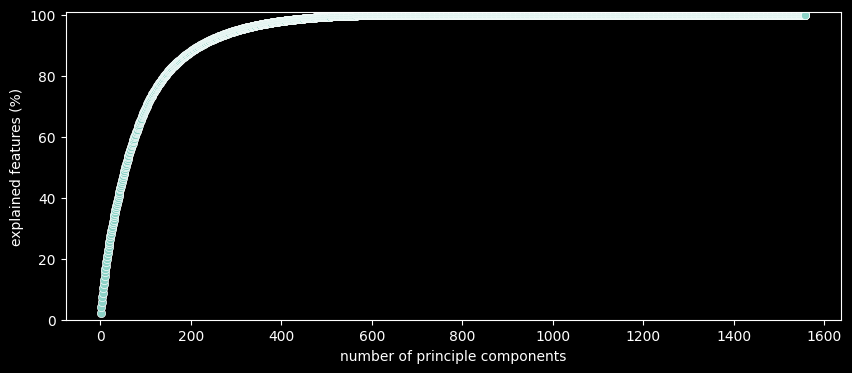

In [43]:
# 200개의 pc로, 80% 정도 분산을 설명할 수 있음
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

fig, ax = plt.subplots(figsize = (10,4))
xi = np.arange(1, reduced.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)*100

plt.ylim(0.0,101)
plt.xlabel('number of principle components')
plt.ylabel('explained features (%)')
sns.scatterplot(x=xi, y=y)

In [44]:
# 차원 축소 데이터셋 생성
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ 200개의 주성분 수행
pca = PCA(n_components=400)
pc = pca.fit_transform(X)

pc_df=pd.DataFrame(pc).reset_index(drop=True)
pc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-0.558073,-0.716460,-0.318646,-0.205151,-0.167924,-0.037631,0.136687,0.458809,-1.638302,0.503559,-0.339339,-0.313438,-0.373621,-0.222010,-0.183230,0.238382,-1.008948,-0.499655,-0.257897,0.084674,-0.405169,-0.416437,0.048338,0.049027,0.446290,-0.458583,0.034096,-0.178388,0.087988,0.097382,-0.034082,0.156061,-0.556665,0.143569,-0.209789,0.009819,-0.472960,-0.032815,-0.155382,-0.202298,-0.043739,0.493903,-0.319840,0.030701,0.284658,0.134525,-0.631335,-0.651759,-0.099502,0.009948,...,-0.220134,0.399249,0.602540,0.198818,-0.172878,-0.022968,0.564906,-0.536354,0.879596,0.249312,1.050798,-0.228196,1.113397,-0.062325,-0.435261,-0.444991,-0.370471,0.250431,0.034826,0.574011,-0.203061,-0.373121,-0.429310,-0.983924,0.416098,-0.091317,0.376116,0.138060,-0.655156,-0.736858,-0.766994,-0.749791,-1.080305,0.777750,-0.126153,-0.154775,-0.212251,-0.205800,-0.305021,0.302133,0.727686,-0.705949,-0.837415,-0.354881,1.128014,0.118999,0.338921,-0.516882,0.507158,0.049608
1,0.839736,2.780655,45.142385,-3.666786,-0.072672,0.504779,-0.124755,-0.944295,1.803643,0.223604,0.283281,0.022416,0.196558,-0.103382,0.080243,-0.094762,0.429636,0.283695,0.017117,0.065978,0.052612,0.106159,-0.074138,0.014395,0.381447,0.004465,-0.103393,-0.305270,0.823593,-0.309000,0.426314,0.173489,0.275580,0.028116,-1.058714,3.503066,-3.636442,42.972966,12.041876,-6.543542,-0.530800,1.432913,1.155581,1.101464,2.441682,0.166107,1.005005,1.449722,-0.980701,0.098810,...,-1.874446,1.276065,0.246648,-1.087328,0.604870,-1.672369,0.767261,1.558596,0.443739,1.838171,-0.092274,-0.486461,0.648665,-1.071614,-1.567847,-0.030642,2.005305,0.007234,0.194439,-1.339702,-1.639067,-0.368869,0.260705,0.865033,0.798524,-0.876692,-0.902335,0.373380,-0.585663,-1.688215,0.574413,-1.777848,0.128135,-1.155459,-1.021616,-0.718751,-0.730583,-1.865189,0.460799,0.413619,-0.008158,0.379559,-0.269959,-1.151465,-0.040840,0.759376,0.149888,-0.152256,0.122799,0.336542
2,-0.582238,-0.819797,-0.368414,-0.195936,0.379765,-0.029070,0.191940,0.620065,-1.991022,0.629783,-0.464658,-0.206467,-0.225963,-0.230226,5.313308,-0.643148,0.973630,0.015212,0.013370,-0.140216,-0.163417,0.133859,-0.029279,0.074066,0.088955,-0.013143,0.095572,-0.148791,0.015284,0.062556,0.004596,0.201348,-0.481743,0.251992,-0.241935,-0.059923,-0.201971,-0.008355,-0.155226,-0.095932,0.011816,0.107699,-0.242460,0.036673,-0.106045,0.013388,-0.036591,-0.344931,0.313654,0.046232,...,0.293504,-0.122815,-0.089898,0.181058,-0.007601,0.038442,-0.112909,-0.017469,-0.049939,-0.150059,-0.039798,0.004532,-0.018203,0.105111,0.159140,-0.317341,0.013125,0.090216,-0.006937,0.236707,0.162631,0.231688,-0.049980,0.043588,-0.021089,-0.049493,0.034774,0.164204,-0.104387,-0.238699,-0.064287,-0.024967,-0.076535,0.148061,0.065905,-0.376308,0.197330,-0.066023,-0.134371,0.156294,-0.233587,0.014713,-0.252013,-0.192988,-0.499377,0.045430,-0.078538,-0.050027,0.062306,0.044810
3,-0.593084,-0.653150,-0.184986,-0.225468,-0.194809,-0.040701,0.106365,0.357339,-1.239176,0.480431,-0.230315,-0.418809,0.763574,0.085282,0.026716,0.261058,-0.920688,0.290526,-0.079552,-0.216978,-0.413125,0.369143,-0.184963,0.085153,0.011535,-0.060549,0.094562,-0.196672,-0.044675,-0.035375,0.088483,0.198087,-0.544191,0.382437,-0.343733,-0.128639,-0.197241,0.091510,-0.118384,-0.231363,0.081301,0.139160,-0.270052,0.094862,-0.185284,0.120470,-0.056913,-0.566416,0.465506,-0.183638,...,-0.390627,-0.133466,0.169642,0.661991,-0.272646,-0.261715,-0.489855,-0.143466,-0.375394,-0.249321,0.288496,0.331621,0.061807,-0.038596,0.361358,0.302665,0.178691,-0.283354,0.257823,0.007098,-0.093045,-0.225944,-0.123327,0.449021,0.418999,-0.029866,0.325574,-0.089717,0.009002,0.176500,0.185365,

In [45]:
# 모델 생성 및 학습
import pandas as pd
import numpy as np

# 정규 분포를 이용하여 데이터 분포에 타원을 그림, 타원에서 벗어날수록 outlier
from sklearn.covariance import EllipticEnvelope

outlier_detector = EllipticEnvelope(contamination=.10)

outlier_detector.fit(pc_df)

# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주.
pred = outlier_detector.predict(pc_df)
pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [46]:
pd.Series(pred).value_counts()

 1    1586
-1     177
Name: count, dtype: int64

In [47]:
# 평가를 위해 다시 라벨링
y_pred = np.where(pred==-1,1,0)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1620
         1.0       0.25      0.31      0.28       143

    accuracy                           0.87      1763
   macro avg       0.60      0.62      0.60      1763
weighted avg       0.88      0.87      0.88      1763



In [49]:
answer = pd.DataFrame({ 'pred' : y_pred,
                        'Class' : Y}, columns = ['pred', 'Class'])

In [51]:
# scoring 기반 threshold 조정
outlier_detector.dist_

array([2.33203468e+02, 1.21863528e+07, 4.03724154e+05, ...,
       5.11651929e+02, 2.92704958e+02, 1.01731504e+05])

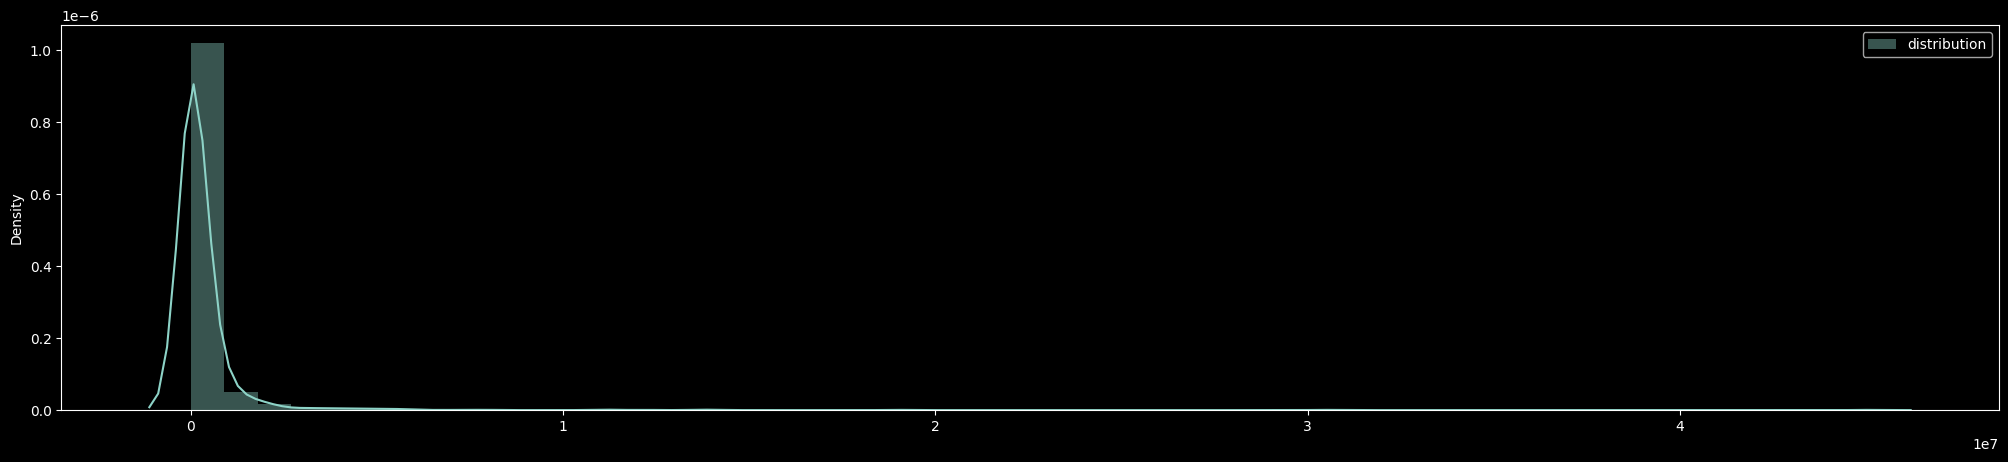

In [52]:
fig, ax = plt.subplots(figsize = (25,5))
sns.distplot(outlier_detector.dist_, label='distribution');
plt.legend();

In [53]:
y_pred_re = np.where(outlier_detector.dist_ > 0.09*pow(10,7),1,0)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred_re))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      1620
         1.0       0.24      0.24      0.24       143

    accuracy                           0.88      1763
   macro avg       0.59      0.59      0.59      1763
weighted avg       0.88      0.88      0.88      1763



In [55]:
pd.Series(y_pred_re).value_counts()

0    1619
1     144
Name: count, dtype: int64